# Fraud Detection Project.....

### Detecting Fraudulent and Non-Fraudulent Transactions..(A classification Project)

- **General Information about the dataset:-**
    The datasets contains transactions made by credit cards in September 2013 by european cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**The Speciality of this dataset is that, the dataset is highly imbalanced.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_fraud_df = pd.read_csv("C:\\Users\\raj28\\Dropbox\\Dropbox Datasets\\creditcard.csv")

In [3]:
credit_fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> By looking at the head of the dataframe we can recognize only three columns namely:- Time, Amount, Class. The other features are been already scaled down for security purposes.
Here "Class" is our dependent feature. This is a classification project.

In [4]:
credit_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_fraud_df["Time"].values

array([0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.72788e+05,
       1.72788e+05, 1.72792e+05])

In [7]:
# Looking for any Null values in our dataset..
credit_fraud_df.isnull().sum().sum()

0

In [8]:
# Our dataset is already cleaned. We can carry on with Data Exploration steps.

In [9]:
# let's look at all the available columns:
credit_fraud_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Value counts of the target feature
credit_fraud_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# The Target feature "Class" is highly imbalanced.

In [12]:
# Percentage of fraud transactions in our dataset:
len(credit_fraud_df[credit_fraud_df["Class"]==1])/credit_fraud_df.shape[0]*100

0.1727485630620034

In [13]:
# Percentage of Non-fraud transactions in the dataset (Following the same procedure as above):
len(credit_fraud_df[credit_fraud_df["Class"]==0])/credit_fraud_df.shape[0]*100

99.82725143693798

We cannot use the original dataset for training our machine learning model has it will everytime predict values to be Non-Fraud.

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

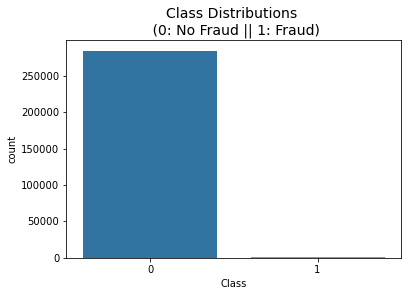

In [14]:
# Let's look at the countplot of the "Class" feature
sns.countplot("Class", data = credit_fraud_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Transcation Time')

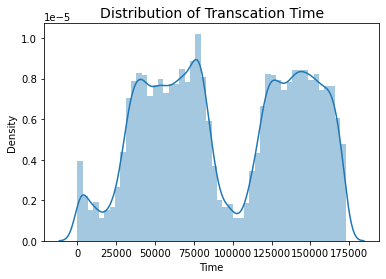

In [15]:
sns.distplot(credit_fraud_df["Time"])
plt.title("Distribution of Transcation Time", fontsize = 14)

C:\Users\raj28\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Transcation Amount')

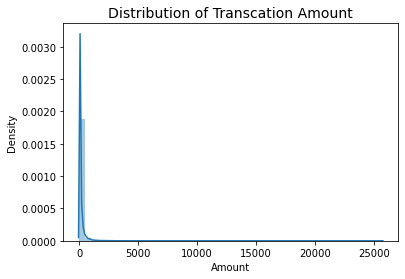

In [16]:
sns.distplot(credit_fraud_df["Amount"])
plt.title("Distribution of Transcation Amount", fontsize = 14)

In [17]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [19]:
std_scaler = StandardScaler()
rbt_scaler = RobustScaler()

In [20]:
credit_fraud_df["scaled_time"] = rbt_scaler.fit_transform(credit_fraud_df["Time"].values.reshape(-1,1))

In [21]:
credit_fraud_df["scaled_amount"] = rbt_scaler.fit_transform(credit_fraud_df["Amount"].values.reshape(-1,1))

In [22]:
credit_fraud_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.994983,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.994983,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.994972,4.983721


In [23]:
# Dropping the "Time" and "Amount" columns.
new_df = credit_fraud_df.drop(["Time","Amount"], axis = 1)

In [24]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'scaled_time',
       'scaled_amount'],
      dtype='object')

In [25]:
# Splitting the data..

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('No Frauds', round(new_df['Class'].value_counts()[0]/len(new_df) * 100,2), '% of the dataset')
print('Frauds', round(new_df['Class'].value_counts()[1]/len(new_df) * 100,2), '% of the dataset')

X = new_df.drop('Class', axis=1)
y = new_df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [27]:
# Performing Random Undersplitting..

In [28]:
#in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = new_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = new_df.loc[df['Class'] == 1]
non_fraud_df = new_df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df2 = normal_distributed_df.sample(frac=1, random_state=42)

new_df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.994079,-0.179976
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,0.812780,-0.307413
239,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,...,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.993104,-0.027947
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,0.768888,3.007895
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,0.006967,3.226717


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


C:\Users\raj28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


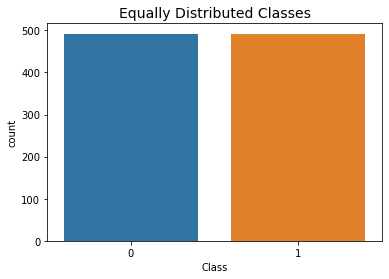

In [29]:
print('Distribution of the Classes in the subsample dataset')
print(new_df2['Class'].value_counts()/len(new_df2))



sns.countplot('Class', data=new_df2)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [30]:
# Let's look at features that are highly correlated with our target feature "Class".

In [31]:
new_df2.shape

(984, 31)

In [34]:
corr_matrix = new_df2.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class            1.000000
scaled_time      0.766175
V4               0.685672
V11              0.675408
V2               0.478113
V19              0.268535
V20              0.151902
V21              0.128754
scaled_amount    0.108269
V28              0.107971
V27              0.074154
V8               0.063857
V26              0.054539
V22              0.051141
V23             -0.003291
V13             -0.018859
V25             -0.072055
V24             -0.098485
V15             -0.155419
V5              -0.378402
V1              -0.426422
V18             -0.435873
V6              -0.457721
V7              -0.484249
V17             -0.554530
V9              -0.564955
V16             -0.579323
V3              -0.613963
V10             -0.631532
V12             -0.701195
V14             -0.739062
Name: Class, dtype: float64

In [39]:
# Let's visualize some of the important features which are highly correlated positively or negatively..
high_corr = ["Class","scaled_time","V14","V12","V10","V4","V11","V2"]

In [40]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Class', ylabel='Class'>,
        <AxesSubplot:xlabel='scaled_time', ylabel='Class'>,
        <AxesSubplot:xlabel='V14', ylabel='Class'>,
        <AxesSubplot:xlabel='V12', ylabel='Class'>,
        <AxesSubplot:xlabel='V10', ylabel='Class'>,
        <AxesSubplot:xlabel='V4', ylabel='Class'>,
        <AxesSubplot:xlabel='V11', ylabel='Class'>,
        <AxesSubplot:xlabel='V2', ylabel='Class'>],
       [<AxesSubplot:xlabel='Class', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='scaled_time', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='V14', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='V12', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='V10', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='V4', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='V11', ylabel='scaled_time'>,
        <AxesSubplot:xlabel='V2', ylabel='scaled_time'>],
       [<AxesSubplot:xlabel='Class', ylabel='V14'>,
        <AxesSubplot:xlabel='scaled_time', ylabel=

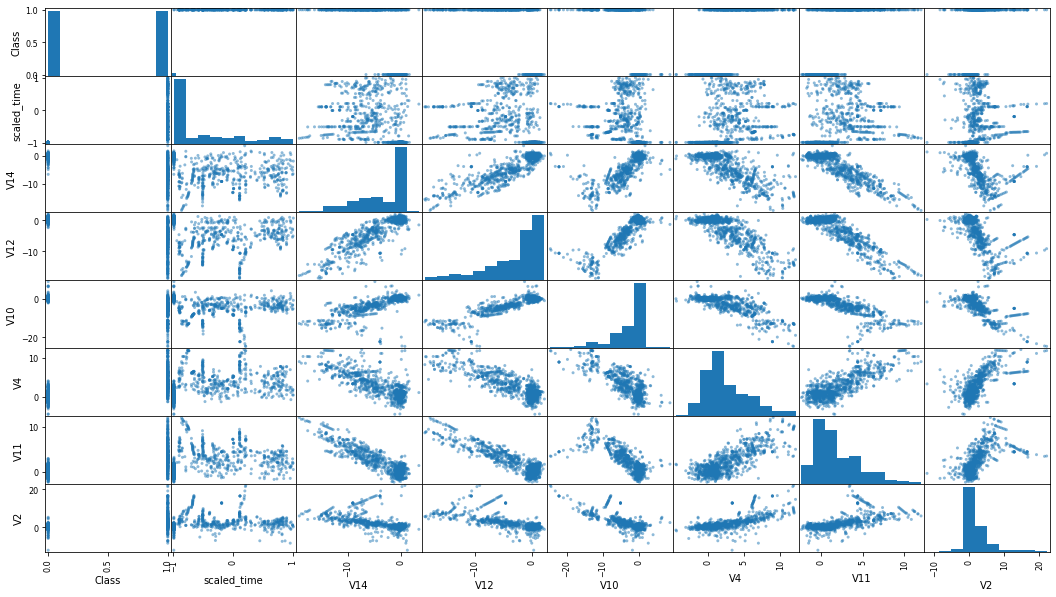

In [41]:
scatter_matrix(new_df2[high_corr],figsize = (18,10))

In [46]:
# We will drop those columns from our analysis that have very low correlation with our target.
drop_cols = ["V20","V21","scaled_amount","V28","V27","V8","V26","V22","V23","V13","V25","V24","V15"]
final_df = new_df2.drop(drop_cols, axis = 1)

In [47]:
final_df.shape

(971, 18)

## Anomaly Detection..

- Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.

In [79]:
final_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'Class', 'scaled_time'],
      dtype='object')

### Removing Extreme outlier values from the all the independent features.

In [56]:
# These corresponding lines of code will find the 1st & 3rd Quartile value and calculate IQR(Inter-Quartile Range).
# Then using IQR we will calculate the upper and lower threshold value for catching outliers and removing them from our analysis.
# The steps are been repeated for each feature. Feel free to skip them.


# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = final_df['V14'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr of V14: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5   # Threshold value
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off or Threshold value: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V14'] > v14_upper) | (final_df['V14'] < v14_lower)].index)
print('----' * 44)


# **** For V1 ****
v1_fraud = final_df['V1'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v1_fraud, 25), np.percentile(v1_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v1_iqr = q75 - q25
print('iqr of V1: {}'.format(v1_iqr))

v1_cut_off = v1_iqr * 1.5   # Threshold value
v1_lower, v1_upper = q25 - v1_cut_off, q75 + v1_cut_off
print('Cut Off or Threshold value: {}'.format(v1_cut_off))
print('V1 Lower: {}'.format(v14_lower))
print('V1 Upper: {}'.format(v14_upper))

outliers = [x for x in v1_fraud if x < v1_lower or x > v1_upper]
print('Feature V1 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V1 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V14'] > v1_upper) | (final_df['V1'] < v1_lower)].index)
print('----' * 44)


# ****  For V2 ****

v2_fraud = final_df['V12'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v2_iqr = q75 - q25
print('iqr of V2: {}'.format(v2_iqr))

v2_cut_off = v2_iqr * 1.5   # Threshold value
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
print('Cut Off or Threshold value: {}'.format(v2_cut_off))
print('V2 Lower: {}'.format(v14_lower))
print('V2 Upper: {}'.format(v14_upper))

outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V2 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V2'] > v2_upper) | (final_df['V2'] < v2_lower)].index)
print('----' * 44)


# # -----> V3 

v3_fraud = final_df['V3'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v3_fraud, 25), np.percentile(v3_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v3_iqr = q75 - q25
print('iqr of V14: {}'.format(v3_iqr))

v3_cut_off =v3_iqr * 1.5   # Threshold value
v3_lower, v3_upper = q25 - v3_cut_off, q75 + v3_cut_off
print('Cut Off or Threshold value: {}'.format(v3_cut_off))
print('V3 Lower: {}'.format(v14_lower))
print('V3 Upper: {}'.format(v14_upper))

outliers = [x for x in v3_fraud if x < v3_lower or x > v3_upper]
print('Feature V3 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V3 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V3'] > v3_upper) | (final_df['V3'] < v3_lower)].index)
print('----' * 44)


# # -----> V4 

v4_fraud = final_df['V4'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v4_iqr = q75 - q25
print('iqr of V4: {}'.format(v4_iqr))

v4_cut_off = v4_iqr * 1.5   # Threshold value
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
print('Cut Off or Threshold value: {}'.format(v4_cut_off))
print('V4 Lower: {}'.format(v4_lower))
print('V4 Upper: {}'.format(v4_upper))

outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V4 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V4'] > v4_upper) | (final_df['V4'] < v4_lower)].index)
print('----' * 44)


# # -----> V5 

v5_fraud = final_df['V5'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v5_fraud, 25), np.percentile(v5_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v5_iqr = q75 - q25
print('iqr of V5: {}'.format(v5_iqr))

v5_cut_off = v5_iqr * 1.5   # Threshold value
v5_lower, v5_upper = q25 - v5_cut_off, q75 + v5_cut_off
print('Cut Off or Threshold value: {}'.format(v5_cut_off))
print('V5 Lower: {}'.format(v5_lower))
print('V5 Upper: {}'.format(v5_upper))

outliers = [x for x in v5_fraud if x < v5_lower or x > v5_upper]
print('Feature V5 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V5 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V5'] > v5_upper) | (final_df['V5'] < v5_lower)].index)
print('----' * 44)


# # -----> V6 

v6_fraud = final_df['V6'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v6_fraud, 25), np.percentile(v6_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v6_iqr = q75 - q25
print('iqr of V6: {}'.format(v6_iqr))

v6_cut_off = v6_iqr * 1.5   # Threshold value
v6_lower, v6_upper = q25 - v6_cut_off, q75 + v6_cut_off
print('Cut Off or Threshold value: {}'.format(v6_cut_off))
print('V6 Lower: {}'.format(v6_lower))
print('V6 Upper: {}'.format(v6_upper))

outliers = [x for x in v6_fraud if x < v6_lower or x > v6_upper]
print('Feature V6 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V6 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V6'] > v6_upper) | (final_df['V6'] < v6_lower)].index)
print('----' * 44)


# # -----> V7 

v7_fraud = final_df['V7'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v7_fraud, 25), np.percentile(v7_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v7_iqr = q75 - q25
print('iqr of V7: {}'.format(v7_iqr))

v7_cut_off = v7_iqr * 1.5   # Threshold value
v7_lower, v7_upper = q25 - v7_cut_off, q75 + v7_cut_off
print('Cut Off or Threshold value: {}'.format(v7_cut_off))
print('V7 Lower: {}'.format(v7_lower))
print('V7 Upper: {}'.format(v7_upper))

outliers = [x for x in v7_fraud if x < v7_lower or x > v7_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V7'] > v7_upper) | (final_df['V7'] < v7_lower)].index)
print('----' * 44)


# # -----> V9 

v9_fraud = final_df['V9'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v9_fraud, 25), np.percentile(v9_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v9_iqr = q75 - q25
print('iqr of V9: {}'.format(v9_iqr))

v9_cut_off = v9_iqr * 1.5   # Threshold value
v9_lower, v9_upper = q25 - v9_cut_off, q75 + v9_cut_off
print('Cut Off or Threshold value: {}'.format(v9_cut_off))
print('V14 Lower: {}'.format(v9_lower))
print('V14 Upper: {}'.format(v9_upper))

outliers = [x for x in v9_fraud if x < v9_lower or x > v9_upper]
print('Feature V9 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V9 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V9'] > v9_upper) | (final_df['V9'] < v9_lower)].index)
print('----' * 44)


# # -----> V11 

v11_fraud = final_df['V11'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v11_iqr = q75 - q25
print('iqr of V11: {}'.format(v11_iqr))

v11_cut_off = v11_iqr * 1.5   # Threshold value
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
print('Cut Off or Threshold value: {}'.format(v11_cut_off))
print('V11 Lower: {}'.format(v11_lower))
print('V11 Upper: {}'.format(v11_upper))

outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V11 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V11'] > v11_upper) | (final_df['V11'] < v11_lower)].index)
print('----' * 44)


# # -----> V16 

v16_fraud = final_df['V16'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v16_iqr = q75 - q25
print('iqr of V16: {}'.format(v16_iqr))

v16_cut_off = v16_iqr * 1.5   # Threshold value
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('Cut Off or Threshold value: {}'.format(v16_cut_off))
print('V16 Lower: {}'.format(v16_lower))
print('V16 Upper: {}'.format(v16_upper))

outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V16 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V16'] > v16_upper) | (final_df['V16'] < v16_lower)].index)
print('----' * 44)


# # -----> V17 

v17_fraud = final_df['V17'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr of V17: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5   # Threshold value
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Cut Off or Threshold value: {}'.format(v17_cut_off))
print('V17 Lower: {}'.format(v17_lower))
print('V17 Upper: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Feature V17 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V17 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V17'] > v17_upper) | (final_df['V17'] < v17_lower)].index)
print('----' * 44)


# # -----> V18 

v18_fraud = final_df['V18'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v18_fraud, 25), np.percentile(v18_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v18_iqr = q75 - q25
print('iqr of V18: {}'.format(v18_iqr))

v18_cut_off = v18_iqr * 1.5   # Threshold value
v18_lower, v18_upper = q25 - v18_cut_off, q75 + v18_cut_off
print('Cut Off or Threshold value: {}'.format(v18_cut_off))
print('V18 Lower: {}'.format(v18_lower))
print('V18 Upper: {}'.format(v18_upper))

outliers = [x for x in v18_fraud if x < v18_lower or x > v18_upper]
print('Feature V18 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V18 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V18'] > v18_upper) | (final_df['V18'] < v18_lower)].index)
print('----' * 44)


# # -----> V19 

v19_fraud = final_df['V19'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v19_fraud, 25), np.percentile(v19_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v19_iqr = q75 - q25
print('iqr of V19: {}'.format(v19_iqr))

v19_cut_off = v19_iqr * 1.5   # Threshold value
v19_lower, v19_upper = q25 - v19_cut_off, q75 + v19_cut_off
print('Cut Off or Threshold value: {}'.format(v19_cut_off))
print('V19 Lower: {}'.format(v19_lower))
print('V19 Upper: {}'.format(v19_upper))

outliers = [x for x in v19_fraud if x < v19_lower or x > v19_upper]
print('Feature V19 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V19 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['V19'] > v19_upper) | (final_df['V19'] < v19_lower)].index)
print('----' * 44)


# # -----> scaled_time 

scaled_time_fraud = final_df['scaled_time'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(scaled_time_fraud, 25), np.percentile(scaled_time_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
scaled_time_iqr = q75 - q25
print('iqr of scaled_time: {}'.format(scaled_time_iqr))

scaled_time_cut_off = scaled_time_iqr * 1.5   # Threshold value
scaled_time_lower, scaled_time_upper = q25 - scaled_time_cut_off, q75 + scaled_time_cut_off
print('Cut Off or Threshold value: {}'.format(scaled_time_cut_off))
print('scaled_time Lower: {}'.format(scaled_time_lower))
print('scaled_time upper: {}'.format(scaled_time_upper))

outliers = [x for x in scaled_time_fraud if x < scaled_time_lower or x > scaled_time_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df["scaled_time"] > scaled_time_upper) | (final_df['scaled_time'] < scaled_time_lower)].index)
print('----' * 44)


# -----> V12 

v12_fraud = final_df['V12'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5    # Threshold value
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
final_df = final_df.drop(final_df[(final_df['V12'] > v12_upper) | (final_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(final_df)))
print('----' * 44)


# Removing outliers V10 Feature

v10_fraud = final_df['V10'].loc[final_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
final_df = final_df.drop(final_df[(final_df['V10'] > v10_upper) | (final_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(final_df)))

Quartile 25: -7.736107250606132 | Quartile 75: -3.2032449497568605
iqr of V14: 4.532862300849271
Cut Off or Threshold value: 6.799293451273908
V14 Lower: -14.53540070188004
V14 Upper: 3.596048501517047
Feature V14 Outliers for Fraud Cases: 0
V14 outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -2.7864023196079577 | Quartile 75: 0.33252320133963653
iqr of V1: 3.1189255209475943
Cut Off or Threshold value: 4.678388281421391
V1 Lower: -14.53540070188004
V1 Upper: 3.596048501517047
Feature V1 Outliers for Fraud Cases: 3
V1 outliers:[-7.50392623748137, -8.25711081724667, -7.92389070083426]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -6.115055292757135 | Quartile 75: -2.09366295099846
iqr of V2: 4.

In [57]:
final_df.shape

(725, 18)

In [59]:
final_df["Class"].value_counts()

0    422
1    303
Name: Class, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X = final_df.drop(["Class"],axis = 1)
y = final_df["Class"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training different classification models

# Logistic Regression..

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [63]:
log_predict = log_reg.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(f"Confusion matrix\n ",confusion_matrix(y_test,log_predict))
print("\n")
print(f"Classification matrix\n" ,classification_report(y_test,log_predict))

Confusion matrix
  [[108   1]
 [  3  70]]


Classification matrix
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.99      0.96      0.97        73

    accuracy                           0.98       182
   macro avg       0.98      0.97      0.98       182
weighted avg       0.98      0.98      0.98       182



In [69]:
log_reg.score(X_train,y_train)

0.990791896869245

## Beautiful !! Our Logistic model gave us an accuracy of 99% which is awesome !!

# Decision Tree..

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier()

In [75]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
dtree_pred = dtree.predict(X_test)

In [77]:
print(f"Confusion matrix\n ",confusion_matrix(y_test,dtree_pred))
print("\n")
print(f"Classification matrix\n" ,classification_report(y_test,dtree_pred))

Confusion matrix
  [[109   0]
 [  0  73]]


Classification matrix
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        73

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [78]:
dtree.score(X_train,y_train)

1.0

## Wow !! The Decision Tree Model gave a perfect accuracy of 100%.

### So Decision Tree is the best model for this problem..

# So, That's It !!